<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/UTS/Google%20Colab/UTS_Machine_Learning_Mochamad_Phillia_Wibowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UTS MACHINE LEARNING

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Model : Random Forest

Dataset : https://www.kaggle.com/datasets/parisrohan/credit-score-classification/download?datasetVersionNumber=1

# Persiapan Data

Memuat Library yang diperlukan

---



In [ ]:
# Digunakan untuk operasi array dan manipulasi numerik.
import numpy as np

# Digunakan untuk manipulasi data dan analisis data.
import pandas as pd

# Library untuk membuat visualisasi data interaktif.
import plotly.express as px

# Library lain untuk membuat visualisasi data interaktif.
import plotly.graph_objects as go

# Library untuk membuat visualisasi data statis.
import matplotlib.pyplot as plt

# Library untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

# Untuk mengkodekan variabel kategorikal menjadi numerik.
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Untuk pemilihan fitur berdasarkan informasi mutal.
from sklearn.feature_selection import mutual_info_classif

# Untuk membagi data menjadi data latih dan data uji.
from sklearn.model_selection import train_test_split

# Model pohon keputusan ensambel.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Untuk evaluasi model.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

# Untuk menangani ketidakseimbangan kelas dalam data klasifikasi.
from imblearn.over_sampling import SMOTE

# Implementasi algoritma XGBoost untuk regresi.
from xgboost import XGBRegressor

# Untuk menangani peringatan yang tidak perlu.
import warnings

# Mengabaikan peringatan FutureWarning.
warnings.filterwarnings("ignore", category=FutureWarning)


Kode ini adalah contoh penggunaan beberapa pustaka umum yang digunakan dalam analisis dan pemodelan data. Mari kita lihat penjelasannya satu per satu:

1. `import numpy as np`: NumPy adalah pustaka yang digunakan untuk komputasi numerik. Ini menyediakan dukungan untuk array dan matriks, serta berbagai fungsi matematika.

2. `import pandas as pd`: Pandas adalah pustaka untuk manipulasi dan analisis data. Ini menyediakan struktur data yang kuat dan mudah digunakan yang disebut DataFrame.

3. `import plotly.express as px`: Plotly Express adalah pustaka untuk membuat visualisasi data interaktif dengan mudah dan cepat.

4. `import plotly.graph_objects as go`: Plotly Graph Objects adalah pustaka yang memberikan kontrol yang lebih besar dalam membuat visualisasi data dengan Plotly.

5. `import matplotlib.pyplot as plt`: Matplotlib adalah pustaka yang sering digunakan untuk membuat visualisasi statis dalam Python.

6. `import seaborn as sns`: Seaborn adalah pustaka yang dibangun di atas Matplotlib untuk membuat visualisasi data statistik yang menarik dan informatif.

7. `from sklearn.preprocessing import OrdinalEncoder, LabelEncoder`: Sklearn adalah pustaka yang digunakan untuk machine learning di Python. OrdinalEncoder dan LabelEncoder digunakan untuk mengkodekan variabel kategorikal menjadi angka.

8. `from sklearn.feature_selection import mutual_info_classif`: Ini adalah pustaka dari Sklearn yang digunakan untuk pemilihan fitur berdasarkan informasi mutual antara fitur dan target.

9. `from sklearn.model_selection import train_test_split`: Ini digunakan untuk membagi dataset menjadi subset pelatihan dan pengujian.

10. `from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor`: Ini adalah pustaka dari Sklearn yang digunakan untuk membangun model RandomForest untuk klasifikasi dan regresi.

11. `from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error`: Ini adalah pustaka dari Sklearn yang digunakan untuk mengevaluasi kinerja model, seperti mencetak laporan klasifikasi, matriks kebingungan, dan menghitung akurasi.

12. `from imblearn.over_sampling import SMOTE`: Ini adalah pustaka untuk menangani ketidakseimbangan kelas dalam data dengan oversampling menggunakan metode SMOTE.

13. `from xgboost import XGBRegressor`: XGBoost adalah pustaka yang digunakan untuk implementasi algoritma boosting yang efisien, biasanya digunakan untuk regresi dan klasifikasi.

14. `import warnings`: Warnings adalah modul bawaan Python yang digunakan untuk mengelola dan menangani pesan peringatan.

Dengan mengimpor semua pustaka ini, Anda siap untuk melakukan analisis dan pemodelan data dengan berbagai teknik dan algoritma. Selanjutnya, Anda dapat menggunakannya untuk mengimpor dataset, membersihkan data, melakukan visualisasi, membangun dan mengevaluasi model machine learning, dan banyak lagi.

Menghubungkan GDrive ke GColab

---



In [ ]:
# Modul untuk menghubungkan Google Drive dengan Colab.
from google.colab import drive

# Menghubungkan Google Drive dengan Colab.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Kode yang Anda berikan adalah kode untuk menghubungkan Google Colab dengan Google Drive. Ini memungkinkan Anda mengakses file-file yang disimpan di Google Drive Anda langsung dari Google Colab.

Penjelasan singkat tentang kode tersebut:

- `from google.colab import drive`: Ini mengimpor modul drive dari pustaka google.colab.
- `drive.mount('/content/gdrive')`: Ini memanggil fungsi mount dari modul drive untuk me-mount Google Drive Anda ke direktori /content/gdrive di Google Colab.

Saat Anda menjalankan kode ini, Google Colab akan meminta Anda untuk masuk ke akun Google Anda dan memberikan kode autentikasi untuk menghubungkan Colab ke Google Drive Anda. Setelah berhasil, Anda dapat mengakses file yang ada di Google Drive Anda melalui path /content/gdrive.

Membaca dan Menampilkan Data

---



In [ ]:
# Membaca file 'train.csv' dari Google Drive.
train = pd.read_csv('/content/gdrive/MyDrive/Credit score classification/train.csv', dtype={'Column26': str})

# Menampilkan lima baris pertama dari dataframe 'train'.
train.head()

<ipython-input-3-60b4835c1834>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/gdrive/MyDrive/Credit score classification/train.csv', dtype={'Column26': str})


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Pra Prosesan Data

Membersihkan Data

---



In [ ]:
# Perintah menampilkan struktur dataframe train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Output dari train.info() memberikan informasi tentang struktur DataFrame train, termasuk jumlah entri, jumlah kolom, nama kolom, jumlah nilai non-null di setiap kolom, dan tipe data masing-masing kolom.

1. <class 'pandas.core.frame.DataFrame'>: Ini menunjukkan bahwa objek yang sedang ditangani adalah DataFrame dari pustaka Pandas.

2. RangeIndex: 100000 entries, 0 to 99999: DataFrame memiliki 100.000 entri dan indeks yang membentang dari 0 hingga 99.999.

3. Data columns (total 28 columns): Terdapat total 28 kolom dalam DataFrame.

4. Column dan Dtype: Daftar kolom dan tipe data masing-masing kolom. Dalam hal ini, terdapat kolom dengan tipe data float64, int64, dan object.

5. Non-Null Count: Menunjukkan jumlah nilai non-null (non-kosong) di setiap kolom. Kolom dengan jumlah non-null yang lebih kecil dari jumlah entri menunjukkan adanya nilai yang hilang (missing values).

Data Format

---



Pada data format, disini kode akan mengisi nilai yang hilang dengan '0', mengekstrak angka dari nilai-nilai, dan mengonversi mereka menjadi bilangan bulat dalam kolom-kolom dibawah.

> Kolom : Age / Num_of_Loan / Num_of_Delayed_Payment



In [ ]:
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

1. train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int):
  - fillna('0'): Mengisi nilai yang hilang (missing values) dalam kolom 'Age' dengan string '0'.
  - str.extract('(\d+)'): Menggunakan ekspresi reguler untuk mengekstrak angka dari setiap nilai dalam kolom 'Age'.
  - astype(float): Mengonversi nilai-nilai yang diekstrak menjadi tipe data float.
  - astype(int): Mengonversi nilai-nilai float menjadi tipe data integer.
  - Hasilnya adalah kolom 'Age' yang sekarang berisi nilai integer yang mewakili usia.

2. train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int):
  - fillna('0'): Mengisi nilai yang hilang (missing values) dalam kolom 'Num_of_Loan' dengan string '0'.
  - str.extract('(\d+)'): Menggunakan ekspresi reguler untuk mengekstrak angka dari setiap nilai dalam kolom 'Num_of_Loan'.
  - astype(float): Mengonversi nilai-nilai yang diekstrak menjadi tipe data float.
  - astype(int): Mengonversi nilai-nilai float menjadi tipe data integer.
  - Hasilnya adalah kolom 'Num_of_Loan' yang sekarang berisi nilai integer yang mewakili jumlah pinjaman.

3. train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int):
  - fillna('0'): Mengisi nilai yang hilang (missing values) dalam kolom 'Num_of_Delayed_Payment' dengan string '0'.
  - str.extract('(\d+)'): Menggunakan ekspresi reguler untuk mengekstrak angka dari setiap nilai dalam kolom 'Num_of_Delayed_Payment'.
  - astype(float): Mengonversi nilai-nilai yang diekstrak menjadi tipe data float.
  - astype(int): Mengonversi nilai-nilai float menjadi tipe data integer.
  - Hasilnya adalah kolom 'Num_of_Delayed_Payment' yang sekarang berisi nilai integer yang mewakili jumlah pembayaran yang tertunda.

> Kolom : Annual_Income

In [ ]:
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

Kode ini untuk menghapus karakter non-digit dari nilai-nilai dalam kolom 'Annual_Income' menggunakan ekspresi reguler, dan kemudian mengonversi nilai-nilai tersebut menjadi tipe data float.

> Kolom : Changed_Credit_Limit

In [ ]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

Kode tersebut mengganti nilai '_' dengan NaN (nilai kosong) dalam kolom 'Changed_Credit_Limit', kemudian mengonversi nilai-nilai tersebut menjadi numerik, dengan parameter errors='coerce' yang mengubah nilai yang tidak dapat diubah menjadi NaN. Akhirnya, nilai-nilai NaN diganti dengan '0'.

> Kolom : Outstanding_Debt

In [ ]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

Kode ini untuk mengonversi nilai-nilai dalam kolom 'Outstanding_Debt' menjadi string, kemudian menghapus karakter non-digit dari nilai-nilai tersebut menggunakan ekspresi reguler. Selanjutnya, nilai-nilai tersebut dikonversi menjadi numerik, dengan parameter errors='coerce' yang mengubah nilai yang tidak dapat diubah menjadi NaN. Akhirnya, nilai-nilai NaN diganti dengan '0'.

> Kolom : Amount_invested_monthly

In [ ]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

Kode ini untuk mengonversi nilai-nilai dalam kolom 'Amount_invested_monthly' menjadi string, kemudian mengganti nilai kosong dengan '0'. Selanjutnya, karakter non-digit dihapus dari nilai-nilai tersebut menggunakan ekspresi reguler. Nilai-nilai tersebut kemudian dikonversi menjadi numerik, dengan parameter errors='coerce' yang mengubah nilai yang tidak dapat diubah menjadi NaN. Akhirnya, nilai-nilai NaN diganti dengan '0'.

> Kolom : Monthly_Balance

In [ ]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

Kode ini untuk mengonversi nilai-nilai dalam kolom 'Monthly_Balance' menjadi string, kemudian menghapus karakter non-digit (kecuali '-') dari nilai-nilai tersebut menggunakan ekspresi reguler. Setelah itu, nilai-nilai tersebut dikonversi menjadi numerik, dengan parameter errors='coerce' yang mengubah nilai yang tidak dapat diubah menjadi NaN. Akhirnya, nilai-nilai NaN diganti dengan '0'.

> Kolom : Credit History Age

In [ ]:
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

Fungsi parse_years_and_months ini mengonversi nilai usia dalam format "tahun" dan "bulan" menjadi total jumlah bulan. Berikut adalah penjelasan singkatnya:

- Fungsi menerima satu argumen, age, yang diasumsikan sebagai string.
- Fungsi memeriksa apakah age merupakan string atau bukan menggunakan isinstance().
- Jika age adalah string, ia akan membaginya berdasarkan string ' Years and ' dan ' Months' untuk mendapatkan bagian tahun dan bulan.
- Nilai tahun diubah menjadi integer, sedangkan nilai bulan diambil dari bagian string kedua dan juga diubah menjadi integer.
- Kemudian, total jumlah bulan dihitung dengan mengalikan tahun dengan 12 dan menambahkannya dengan jumlah bulan.
- Fungsi mengembalikan total jumlah bulan.
- Jika age bukan string, fungsi mengembalikan nilai 0.

Penerapan fungsi ini pada kolom 'Credit_History_Age' dari DataFrame train akan menghasilkan kolom baru 'Credit_History_Age_Months' yang berisi total jumlah bulan dari usia kredit.

Duplicates

---



In [ ]:
# Metode duplicated()
duplicates = train[train.duplicated()]

# Menampung jumlah baris yang duplikat menggunakan shape[0]
num_duplicates = duplicates.shape[0]

# Pengujian kondisional
if num_duplicates == 0:
    print("Tidak ada duplikat")
else:
    print("Masih ada", num_duplicates, "duplikat.")

Tidak ada duplikat


Kode ini digunakan untuk menemukan dan menghitung duplikat dalam DataFrame train. Berikut adalah penjelasan singkatnya:

1. duplicates = train[train.duplicated()]: Baris ini mencari duplikat dalam DataFrame train dengan menggunakan metode duplicated(). Ini akan menghasilkan DataFrame baru yang berisi baris duplikat.

2. num_duplicates = duplicates.shape[0]: Variabel num_duplicates menampung jumlah baris duplikat yang ditemukan dengan menggunakan atribut shape[0] dari DataFrame duplicates.

3. if num_duplicates == 0:: Ini adalah pengujian kondisional untuk memeriksa apakah jumlah duplikat adalah 0.

4. print("Tidak ada duplikat"): Jika tidak ada duplikat yang ditemukan, pesan ini akan dicetak.

5. else:: Jika ada duplikat yang ditemukan, pernyataan di bawah ini akan dijalankan.

6. print("Masih ada", num_duplicates, "duplikat."): Jika ada duplikat, pesan ini akan mencetak jumlah duplikat yang ditemukan.

Dengan cara ini, kode ini memberi tahu pengguna apakah ada duplikat dalam DataFrame train atau tidak.

Data Scalling

---



Dalam proses scaling data, kita ingin menyesuaikan rentang nilai setiap fitur sehingga mereka memiliki skala yang serupa. Metode scaling umum termasuk Standard Scaling (z-score normalization) dan Min-Max Scaling.

Namun, sebelum melakukan scaling, penting untuk memperhatikan adanya fitur yang memiliki nilai minimum negatif. Metode Min-Max Scaling tidak cocok untuk fitur-fitur semacam ini, karena akan mengubah nilai-nilai negatif menjadi positif.

In [ ]:
# Mendeskripsikan didalam dataframe train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


- count: Jumlah entri non-null dalam setiap kolom.
- mean: Rata-rata dari setiap kolom.
- std: Standar deviasi dari setiap kolom.
- min: Nilai minimum dari setiap kolom.
- 25%: Kuartil pertama (Q1), atau nilai yang membagi data menjadi 25% terbawah.
- 50%: Median (Q2), atau nilai tengah dari data.
- 75%: Kuartil ketiga (Q3), atau nilai yang membagi data menjadi 25% teratas.
- max: Nilai maksimum dari setiap kolom.

Dengan output diatas, maka akan coba kita hilangkan outlier pada dataframe dengan men-scalling lagi tiap baris yang masih di atas persentil treshold.

In [ ]:
# Memilih kolom tertentu
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Menentukan persentil untuk setiap kolom yang dipilih
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

# Perulangan pada baris kolom untuk menghapus nilai untuk setiap kolom yang masih diatas persentil yang ditentukan sebelumnya
for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]

Kode ini memiliki dua tujuan utama:

1. Memilih kolom tertentu dari DataFrame train.
2. Menghapus baris-baris dari DataFrame train yang memiliki nilai di atas persentil tertentu untuk setiap kolom yang dipilih.

In [ ]:
# Mendeskripsikan didalam dataframe train
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85806.0,120.486003,690.067511,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,85806.0,49378.620726,36478.390299,7005.930000,19294.460000,36780.030000,70825.760000,166837.640000
Monthly_Inhand_Salary,72894.0,4105.781241,3036.319177,303.645417,1623.778333,3069.091667,5899.970000,14131.123333
Num_Bank_Accounts,85806.0,5.372759,2.585031,-1.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,85806.0,5.779048,5.727016,0.000000,4.000000,5.000000,7.000000,171.000000
Interest_Rate,85806.0,14.551174,8.824173,1.000000,7.000000,13.000000,20.000000,128.000000
Num_of_Loan,85806.0,7.318381,18.881665,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,85806.0,21.033483,14.786223,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,85806.0,12.348321,6.845002,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,85806.0,10.189597,6.867078,-6.490000,4.990000,9.280000,14.710000,36.970000


Data sudah bebas dari outlier

Data Entry Plus with Filtering

---



In [ ]:
# Untuk menghilangkan nilai '!@9#%8' pada kolom Payment_Behaviour
train = train[train['Payment_Behaviour'] != '!@9#%8']

In [ ]:
# Untuk menghilangkan nilai '_______' pada kolom Occupation
train = train[train['Occupation'] != '_______']

# Mencetak nilai unik dari kolom Occupation setelah penghapusan dilakukan
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


Kode ini melakukan dua tindakan:

1. Menghapus baris di mana kolom 'Payment_Behaviour' memiliki nilai '!@9#%8'.
2. Menghapus baris di mana kolom 'Occupation' memiliki nilai '_______', kemudian mencetak nilai unik dari kolom 'Occupation' yang tersisa.

Penjelasan detil :
1. train = train[train['Payment_Behaviour'] != '!@9#%8']: Ini menghasilkan DataFrame baru di mana baris-baris dengan nilai '!@9#%8' dalam kolom 'Payment_Behaviour' dihapus.
2. train = train[train['Occupation'] != '_______']: Ini menghasilkan DataFrame baru di mana baris-baris dengan nilai '_______' dalam kolom 'Occupation' dihapus.
3. print(train['Occupation'].unique()): Ini mencetak nilai unik dari kolom 'Occupation' setelah penghapusan dilakukan. Hasilnya adalah array yang berisi berbagai jenis pekerjaan yang tersisa setelah proses filtering.

In [ ]:
# Untuk menghasilkan dataframe baru pada Credit_Mix yang tidak ada nilai '_'
train = train[train['Credit_Mix'] != '_']

# Mencetak nilai unik pada kolom Credit_Mix
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


Kode ini memfilter DataFrame train berdasarkan kolom 'Credit_Mix', yaitu menghapus baris di mana nilai kolom 'Credit_Mix' sama dengan '_'. Kemudian, setelah filtering, kode ini mencetak nilai unik dari kolom 'Credit_Mix' yang tersisa.

Penjelasan detil ⁉
1. train = train[train['Credit_Mix'] != '_']: Ini menghasilkan DataFrame baru di mana baris-baris dengan nilai '_' dalam kolom 'Credit_Mix' dihapus.
2. print(train['Credit_Mix'].unique()): Ini mencetak nilai unik dari kolom 'Credit_Mix' setelah filtering dilakukan. Hasilnya adalah array yang berisi nilai 'Good', 'Standard', dan 'Bad', yang merupakan nilai unik yang tersisa setelah proses filtering

Negative Values

---



In [ ]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Perulangan untuk selain kurang dari 0 dihapus dari dataframe
for column in selected_columns:
    train = train[train[column] >= 0]

Filtering baris berdasarkan kolom tertentu :
- Dalam loop for, setiap kolom yang tercantum dalam selected_columns ('Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts') diperiksa.
- Baris-baris di mana nilai dalam kolom tersebut kurang dari 0 dihapus dari DataFrame train.

In [ ]:
# Dropping Columns (daftar yang ingin di drop)
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Perintah drop columns tersebut
train.drop(columns=columns_to_drop, inplace=True)

Menghapus kolom tertentu :
- Kolom-kolom yang tercantum dalam columns_to_drop ('ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age', 'Monthly_Inhand_Salary', 'Type_of_Loan') dihapus dari DataFrame train menggunakan metode drop() dengan parameter columns=columns_to_drop.
- inplace=True digunakan untuk mengubah DataFrame train secara langsung tanpa perlu menyimpan hasilnya ke variabel baru.

Missing Values

---



In [ ]:
# Memeriksa total jumlah data yang kosong dalam dataframe
total_missing_values = train.isnull().sum().sum()

# Melakukan pengujian kondisional
if total_missing_values == 0:
    print("Tidak ada data yang kosong")
else:
    print("Jumlah data yang kosong :", total_missing_values)

Tidak ada data yang kosong


Kode ini digunakan untuk memeriksa apakah terdapat data yang kosong (missing values) dalam DataFrame train.

Penjelasan:

1. train.isnull().sum().sum(): Memeriksa total jumlah data yang kosong dalam DataFrame train. Metode isnull() digunakan untuk mendeteksi nilai-nilai yang hilang (mengembalikan DataFrame yang berisi nilai boolean True jika nilai adalah null dan False jika tidak), kemudian sum() digunakan dua kali untuk menghitung jumlah total nilai yang hilang di seluruh DataFrame.
2. if total_missing_values == 0:: Melakukan pengujian kondisional, apakah total_missing_values sama dengan 0, yang berarti tidak ada nilai yang hilang dalam DataFrame.
3. print("Tidak ada data yang kosong"): Jika tidak ada nilai yang hilang, pesan ini akan dicetak.
4. else:: Jika ada nilai yang hilang, pernyataan di bawah ini akan dijalankan.
5. print("Jumlah data yang kosong :", total_missing_values): Jika ada nilai yang hilang, pesan ini akan mencetak jumlah total nilai yang hilang dalam DataFrame.

Dalam kasus ini, outputnya menunjukkan bahwa tidak ada data yang kosong dalam DataFrame train.

# Feature Engineering

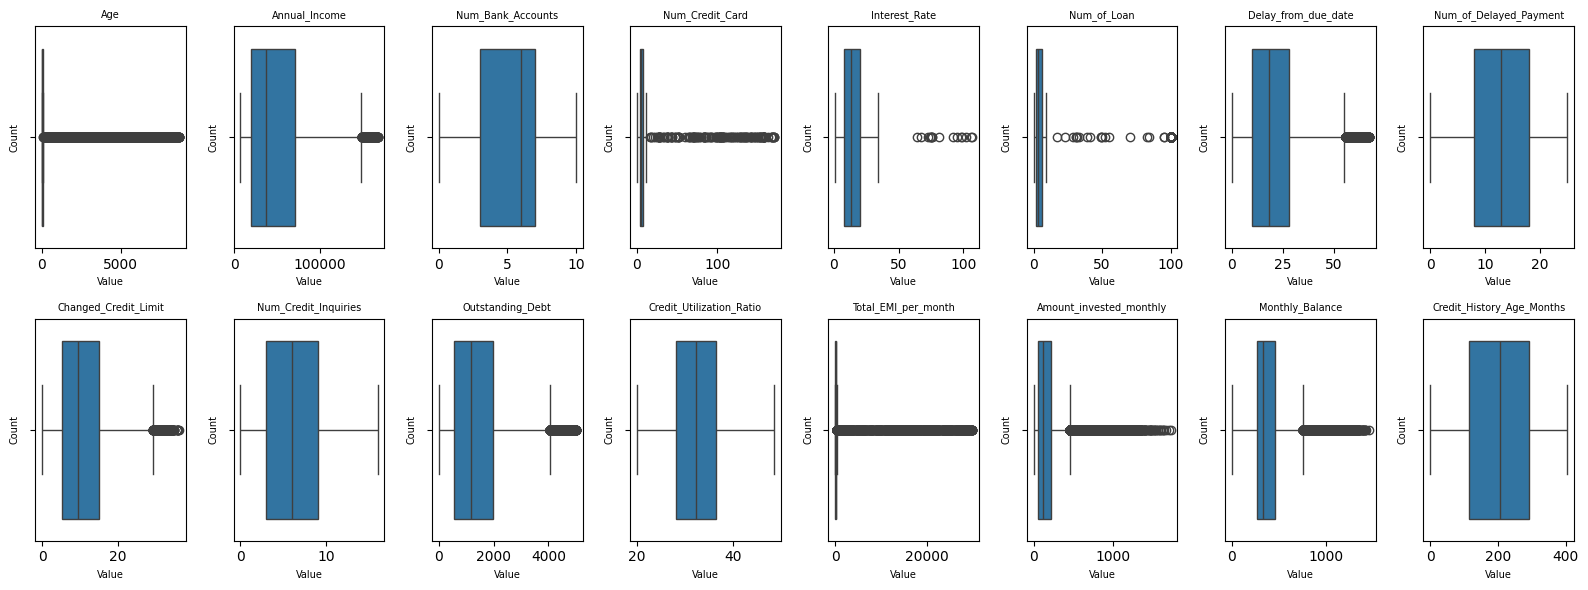

In [ ]:
# Mengidentifikasi jenis-jenis tipe data dan dimasukkan kedalam numerik kolom
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Jumlah kolom yang ingin ditampilkan
num_columns = 8

# Jumlah baris yang ditampilkan sesuai dengan jumlah kolom yang ditentukan diatas
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Ukuran subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

# Loop untuk membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

# Loop untuk menyembunyikan subplot yang tidak digunakan
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Menata ulang tata letak plot agar sesuai
plt.tight_layout()

# Menampilkan Plot
plt.show()

Kode ini digunakan untuk membuat beberapa boxplot untuk setiap kolom numerik dalam DataFrame train. Boxplot ini membantu dalam visualisasi distribusi nilai dan deteksi outlier.

Penjelasan singkat:

- numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns: Mengidentifikasi kolom-kolom numerik dalam DataFrame train dan menyimpannya dalam variabel numeric_columns.
- num_columns = 8: Menentukan jumlah kolom (grafik) yang ingin ditampilkan dalam setiap baris.
- num_rows = (len(numeric_columns) + num_columns - 1) // num_columns: Menghitung jumlah baris yang diperlukan berdasarkan jumlah kolom numerik dan num_columns.
- fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6)): Membuat subplots dengan ukuran dan jumlah baris yang sudah dihitung sebelumnya.
- axes = axes.flatten(): Mengubah array multidimensi axes menjadi array 1 dimensi.
- Loop for digunakan untuk membuat boxplot untuk setiap kolom numerik:
  - sns.boxplot(x=train[column], ax=axes[i]): Membuat boxplot untuk kolom column di subplot ke-i.
  - axes[i].set_title(column, fontsize=7): Menentukan judul subplot dengan nama kolom.
  - axes[i].set_xlabel('Value', fontsize=7): Menentukan label sumbu x.
  - axes[i].set_ylabel('Count', fontsize=7): Menentukan label sumbu y.

- Loop for berikutnya digunakan untuk menyembunyikan subplot yang tidak digunakan.
- plt.tight_layout(): Menata ulang tata letak plot agar sesuai.
- plt.show(): Menampilkan plot.

Dengan kode ini, Anda dapat melihat distribusi nilai dari setiap kolom numerik dalam bentuk boxplot, serta mendeteksi adanya outlier.

Scalling

---





In [ ]:
# Tune scale pada tiap kolom
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

Kode ini bertujuan untuk melakukan scaling pada beberapa kolom tertentu dalam DataFrame train dengan batasan tertentu.

Penjelasan singkat:

- Setiap baris dalam DataFrame train dipertahankan hanya jika nilai dalam kolom yang tercantum di bawah ini memenuhi batasan tertentu:
  - 'Age' kurang dari 60.
'Num_Credit_Card' kurang dari atau sama dengan 10.
  - 'Interest_Rate' kurang dari atau sama dengan 50.
  - 'Num_of_Loan' kurang dari atau sama dengan 12.
  - 'Num_Bank_Accounts' kurang dari atau sama dengan 10.
  - 'Delay_from_due_date' kurang dari atau sama dengan 60.
  - 'Changed_Credit_Limit' kurang dari atau sama dengan 30.
  - 'Num_Credit_Inquiries' kurang dari atau sama dengan 12.
  - 'Total_EMI_per_month' kurang dari atau sama dengan 200.
  - 'Outstanding_Debt' kurang dari atau sama dengan 1500.

Dengan melakukan ini, Anda membatasi nilai dalam kolom-kolom yang tercantum di atas sesuai dengan batasan yang telah ditentukan.

Encoding

---



Kode di bawah melakukan encoding label pada beberapa kolom dalam DataFrame train.

In [ ]:
#Label Encoder
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

Label Encoder untuk 'Credit_Score':
  - Encoder Ordinal digunakan untuk melakukan encoding pada kolom 'Credit_Score'.
  - Encoder diinisialisasi dengan daftar kategori yang diinginkan, yaitu ['Poor', 'Standard', 'Good'].
  - Hasil dari encoding disimpan dalam kolom baru 'Credit_Score_Encoded'.

In [ ]:
# Encoding Occupation
label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

Label Encoder untuk 'Occupation':
  - LabelEncoder dari scikit-learn digunakan untuk melakukan encoding pada kolom 'Occupation'.
  - Hasil encoding disimpan dalam kolom baru 'Occupation_Encoded'.

In [ ]:
#Ordinal Encoder
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

Kode di atas menggunakan encoder ordinal untuk melakukan encoding pada kolom 'Credit_Mix' dalam DataFrame 'train'.

Encoder diinisialisasi dengan daftar kategori yang diinginkan, yaitu ['Bad', 'Standard', 'Good'].

Hasil dari encoding disimpan dalam kolom baru 'Credit_Mix_Encoded'. Dengan menggunakan encoder ordinal, setiap kategori dalam kolom 'Credit_Mix' akan diberi label numerik berdasarkan urutan yang ditentukan dalam daftar kategori tersebut.

In [ ]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])

Ordinal Encoder untuk 'Payment_Behaviour':
  - Encoder Ordinal digunakan untuk melakukan encoding pada kolom 'Payment_Behaviour'.
  - Encoder diinisialisasi dengan daftar kategori yang diinginkan, yaitu categories_payment_behaviour.
  - Hasil dari encoding disimpan dalam kolom baru 'Payment_Behaviour_Encoded'.

Kode di atas menggunakan encoder ordinal untuk melakukan encoding pada kolom 'Payment_Behaviour' dalam DataFrame 'train'.

Encoder diinisialisasi dengan daftar kategori yang diinginkan, yaitu ['Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments'].

Hasil dari encoding disimpan dalam kolom baru 'Payment_Behaviour_Encoded'. Dengan menggunakan encoder ordinal, setiap kategori dalam kolom 'Payment_Behaviour' akan diberi label numerik berdasarkan urutan yang ditentukan dalam daftar kategori tersebut.

In [ ]:
#Dropping Unencoded Columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

Menghapus Kolom yang Sudah diencode Sebelumnya:
  - Kolom-kolom yang sudah diencode sebelumnya, yaitu 'Payment_Behaviour', 'Credit_Mix', 'Occupation', dan 'Credit_Score', dihapus dari DataFrame train menggunakan metode drop().
  - inplace=True digunakan untuk mengubah DataFrame train secara langsung tanpa perlu menyimpan hasilnya ke variabel baru.

New Features

---



In [ ]:
# Menghitung total jumlah (Bank Accounts + Credit Cards)

train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Menghitung total jumlah hutang per akun

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Menghitung perbandingan hutang dan pemasukan

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Menghitung total jumlah pembayaran yang telat per akun

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Menghitung pengeluaran bulanan (EMI + Investasi bulanan)

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']

Kode di atas melakukan perhitungan tambahan pada DataFrame train untuk menciptakan fitur-fitur baru yang mungkin berguna dalam analisis atau pemodelan data. Berikut adalah penjelasan dari setiap perhitungan:

1. Total_Num_Accounts:
Menghitung total jumlah akun dengan menjumlahkan 'Num_Bank_Accounts' dan 'Num_Credit_Card'. Fitur ini memberikan gambaran tentang total akun yang dimiliki oleh pelanggan.
2. Debt_Per_Account:
Menghitung rata-rata hutang per akun dengan membagi 'Outstanding_Debt' dengan 'Total_Num_Accounts'. Fitur ini memberikan informasi tentang seberapa besar rata-rata hutang yang dimiliki oleh setiap akun.
3. Debt_to_Income_Ratio:
Menghitung rasio hutang terhadap pendapatan dengan membagi 'Outstanding_Debt' dengan 'Annual_Income'. Fitur ini membantu dalam mengevaluasi kemampuan seseorang untuk membayar hutang berdasarkan pendapatannya.
4. Delayed_Payments_Per_Account:
Menghitung jumlah pembayaran yang telat per akun dengan membagi 'Num_of_Delayed_Payment' dengan 'Total_Num_Accounts'. Fitur ini memberikan informasi tentang seberapa sering pembayaran telat terjadi per akun.
5. Total_Monthly_Expenses:
Menghitung total pengeluaran bulanan dengan menjumlahkan 'Total_EMI_per_month' dan 'Amount_invested_monthly'. Fitur ini memberikan gambaran tentang total pengeluaran bulanan pelanggan termasuk cicilan dan investasi.

Dengan menciptakan fitur-fitur ini, Anda dapat memperkaya data Anda dengan informasi tambahan yang dapat digunakan dalam analisis lebih lanjut atau dalam membangun model prediksi.

Mutual Information Scores (MI Score)​

---



In [ ]:
# Mengidentifikasi kolom-kolom kategorikal dalam DataFrame 'train'
categorical_columns = train.select_dtypes(include=['object']).columns

# Membuat salinan data 'train' untuk proses encoding
data_encoded = train.copy()

# Membuat encoder Ordinal
encoder = OrdinalEncoder()

# Melakukan encoding pada kolom-kolom kategorikal menggunakan encoder Ordinal
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Memisahkan target (y) dan fitur-fitur (X) dari data yang telah diencode
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

# Menghitung skor informasi mutual antara setiap fitur dalam X dan target y
mi_scores = mutual_info_classif(X, y)

# Mencetak skor informasi mutual untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.01098262062094002
Feature 'Annual_Income': Mutual Information Score = 0.427485666172875
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.06140714265320235
Feature 'Num_Credit_Card': Mutual Information Score = 0.07414252477232597
Feature 'Interest_Rate': Mutual Information Score = 0.09931801640079341
Feature 'Num_of_Loan': Mutual Information Score = 0.02259043893278556
Feature 'Delay_from_due_date': Mutual Information Score = 0.07110212703176733
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.054170701460416026
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.09860654680483916
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.027454255643937886
Feature 'Outstanding_Debt': Mutual Information Score = 0.4320970898018073
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0008940600062685711
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07198116200383686
Feature 'Total_EMI

Kode di atas digunakan untuk menghitung skor informasi mutual (mutual information score) antara setiap fitur dalam dataset (X) dan target (y) yang telah diencode. Skor informasi mutual mengukur seberapa banyak informasi tentang target yang dapat diperoleh dari suatu fitur. Hasilnya dicetak dalam loop untuk setiap fitur dalam dataset. Skor ini dapat membantu dalam pemilihan fitur untuk model pembelajaran mesin, di mana fitur-fitur dengan skor yang lebih tinggi cenderung lebih informatif dalam memprediksi target.

In [ ]:
# Mengurutkan skor informasi mutual dan nama fitur secara terbalik
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Mendapatkan nama fitur yang sudah diurutkan
sorted_columns = [x[0] for x in sorted_mi_scores]

# Mendapatkan skor informasi mutual yang sudah diurutkan
sorted_scores = [x[1] for x in sorted_mi_scores]

# Skala warna yang digunakan untuk plot
colorscale = 'Viridis'

# Membuat plot batang dengan menggunakan skor informasi mutual dan nama fitur
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Skor Informasi Mutual', len=0.5, y=0.2)))])

# Menyesuaikan tata letak plot dan memberi judul pada sumbu-sumbunya
fig.update_layout(title='Skor Informasi Mutual untuk Setiap Fitur',
                  xaxis_title='Fitur',
                  yaxis_title='Skor Informasi Mutual')

# Menampilkan plot
fig.show()

Kode di atas menghasilkan sebuah plot batang yang menunjukkan skor informasi mutual untuk setiap fitur dalam dataset, yang telah diurutkan berdasarkan skor tersebut secara menurun. Hal ini membantu dalam visualisasi dan pemahaman tentang seberapa informatif setiap fitur dalam memprediksi target. Skala warna pada plot menunjukkan seberapa tinggi skor informasi mutual untuk setiap fitur.

# Machine Learning Model

In [ ]:
# Menyiapkan dataframe untuk latih pada variabel y pada kolom Credit_Score_Encoded
y = train['Credit_Score_Encoded']

# # Menyiapkan dataframe untuk latih pada variabel X pada kolom yang ditentukan dibawah
X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

Kode di atas membagi data menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan proporsi 80:20.

Fitur-fitur yang digunakan untuk membangun model adalah 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts', 'Debt_Per_Account', 'Debt_to_Income_Ratio', dan 'Delayed_Payments_Per_Account'.

Data diacak menggunakan nilai seed 77 untuk memastikan hasil yang konsisten dalam pengujian berulang-ulang.

Random Forest

---



In [ ]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

Kode di atas menciptakan model Regresi Random Forest dengan menggunakan kelas RandomForestRegressor dari modul sklearn.ensemble. Model ini akan dilatih dengan menggunakan data latih (X_train dan y_train).

Parameter yang digunakan untuk membuat model ini adalah sebagai berikut:

- n_estimators=500: Menentukan jumlah pohon keputusan yang akan digunakan dalam ensemble. Dalam hal ini, kami menggunakan 500 pohon.
- bootstrap=True: Menentukan apakah pengambilan sampel bootstrap dilakukan saat pembuatan setiap pohon. Jika diatur ke True, setiap pohon akan dilatih dengan sampel yang diambil secara acak dengan penggantian dari data latih. Ini membantu meningkatkan variasi antar pohon, yang sering kali menghasilkan model yang lebih kuat.
- random_state=77: Menentukan seed untuk pengacakan. Seed ini digunakan untuk membuat hasil yang dapat direproduksi, sehingga model akan memberikan hasil yang konsisten ketika dijalankan berulang kali dengan seed yang sama.

Setelah model dibuat, fungsi fit() digunakan untuk melatih model menggunakan data latih, yaitu fitur-fitur dalam X_train dan label y_train. Model ini akan belajar untuk memetakan fitur-fitur ini ke label y_train, sehingga dapat melakukan prediksi nilai Credit_Score_Encoded berdasarkan fitur-fitur yang diberikan.

# Model Evaluation



Mean Squared Error (MSE)

---



In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1621489922101923


Kode di atas digunakan untuk membuat prediksi menggunakan model Regresi Random Forest yang telah dilatih sebelumnya (model) pada data uji (X_test). Prediksi kemudian disimpan dalam variabel y_pred.

Selanjutnya, menggunakan nilai prediksi (y_pred) dan nilai sebenarnya dari data uji (y_test), dihitung Mean Squared Error (MSE) dengan memanggil fungsi mean_squared_error() dari modul sklearn.metrics. Nilai MSE digunakan sebagai metrik untuk mengevaluasi seberapa baik model melakukan prediksi terhadap data yang belum pernah dilihat sebelumnya.

Hasil MSE kemudian dicetak untuk memberikan informasi tentang seberapa baik model yang telah dilatih mampu melakukan prediksi terhadap data uji. Semakin rendah nilai MSE, semakin baik kinerja model dalam melakukan prediksi.

Accuracy Test

---



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Kode di atas digunakan untuk membuat dan melatih model klasifikasi Random Forest menggunakan RandomForestClassifier dari library scikit-learn. Model tersebut dilatih pada data latih (X_train dan y_train) menggunakan 500 pohon keputusan (estimators) dan penggunaan sampel bootstrap untuk pembangunan setiap pohon.

Setelah melatih model, model tersebut siap untuk digunakan untuk membuat prediksi kelas pada data uji atau digunakan untuk tujuan klasifikasi lainnya.

Accuracy on original test set: 0.8078666235027517

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       901
         1.0       0.84      0.87      0.85      3810
         2.0       0.76      0.74      0.75      1467

    accuracy                           0.81      6178
   macro avg       0.78      0.76      0.77      6178
weighted avg       0.81      0.81      0.81      6178



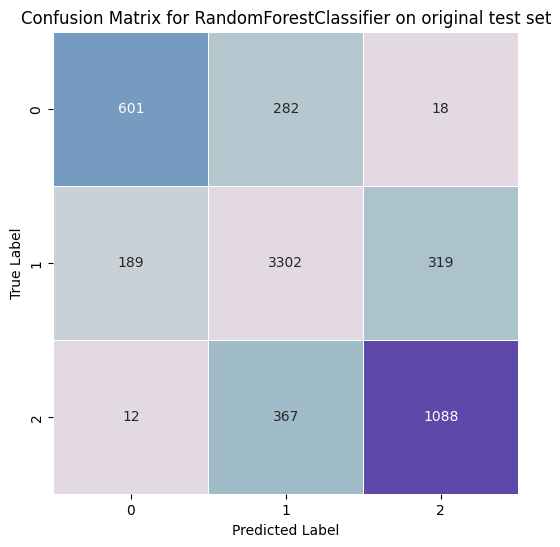

In [ ]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))

Kode tersebut digunakan untuk melakukan evaluasi kinerja model klasifikasi Random Forest pada data uji. Pertama, model digunakan untuk membuat prediksi kelas pada data uji (X_test) menggunakan metode predict().

Kemudian, akurasi model dihitung dengan membandingkan prediksi yang dihasilkan (y_pred) dengan label sebenarnya dari data uji (y_test) menggunakan fungsi accuracy_score() dari modul sklearn.metrics.

Selanjutnya, dilakukan pembuatan confusion matrix dengan memanfaatkan fungsi confusion_matrix() dari modul sklearn.metrics untuk menunjukkan seberapa baik model dalam memprediksi kelas tertentu. Confusion matrix ini ditampilkan menggunakan heatmap dari library Seaborn.

Terakhir, dilakukan pencetakan laporan klasifikasi yang mencakup beberapa metrik evaluasi seperti precision, recall, dan f1-score menggunakan fungsi classification_report() dari modul sklearn.metrics. Laporan ini memberikan informasi lebih detail tentang kinerja model dalam mengklasifikasikan setiap kelas.